In [1]:
import pandas as pd
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Database Connection Parameters
disease_checker = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Alayande1$',
    'database': 'disease_checker',
}


#Connecting to the SQL Database
conn = pymysql.connect(**disease_checker)

In [3]:
parkinson_query = "SELECT * FROM parkinson"

In [4]:
parkinson_df = pd.read_sql(parkinson_query, conn)

C:\Users\PC\AppData\Local\Temp\ipykernel_10648\578669889.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  parkinson_df = pd.read_sql(parkinson_query, conn)


In [5]:
parkinson_df = parkinson_df.replace({'Yes': 1, 'No': 2, 'Male': 1, 'Female': 2, 'High': 1, 'Medium': 2, 'Low': 3, 'Negative': 4, 'Critical': 5})

In [6]:
correlation_matrix = parkinson_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                            id    Gender  Akinesia   Tremors  \
id                    1.000000 -0.005853 -0.006444  0.007258   
Gender               -0.005853  1.000000  0.013550  0.012885   
Akinesia             -0.006444  0.013550  1.000000  0.023262   
Tremors               0.007258  0.012885  0.023262  1.000000   
Postural_Instability -0.007108  0.003318 -0.006317 -0.003340   
Rigidity              0.009252 -0.013855 -0.003495  0.010626   
Cognitive_Challenge  -0.005809  0.023118 -0.014461  0.022502   
Insomnia              0.005607 -0.009127  0.014054 -0.006089   
Constipation          0.014394 -0.010317 -0.018341  0.007901   
Severity             -0.015424 -0.007927  0.141752  0.119776   

                      Postural_Instability  Rigidity  Cognitive_Challenge  \
id                               -0.007108  0.009252            -0.005809   
Gender                            0.003318 -0.013855             0.023118   
Akinesia                         -0.006317 -0.003495            

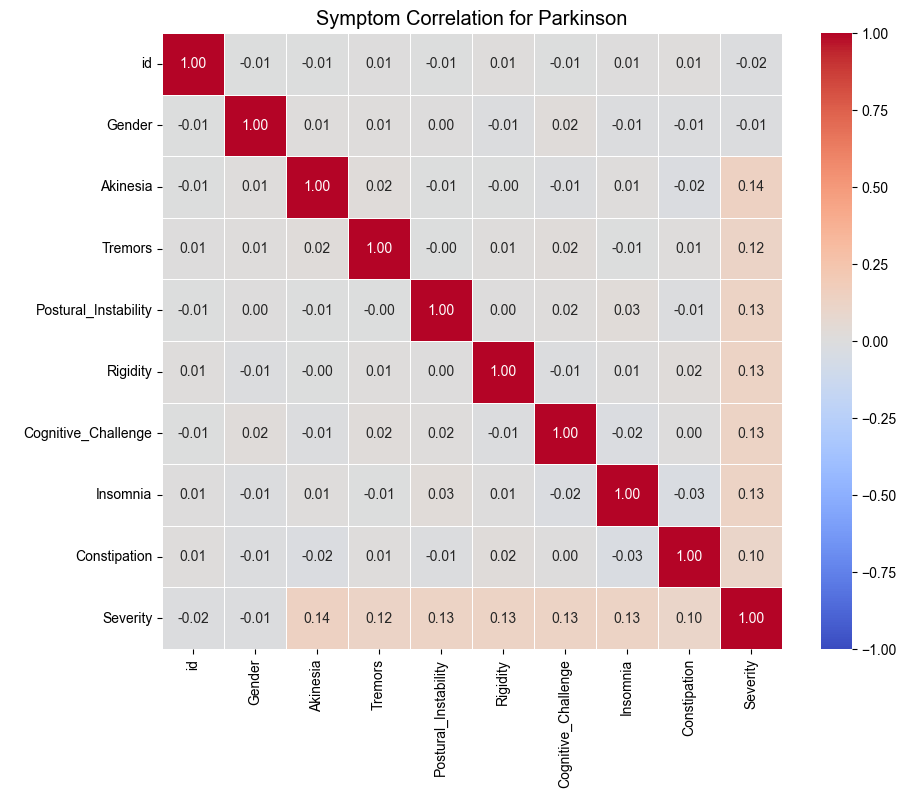

In [7]:
plt.figure(figsize=(10, 8), dpi=100)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)

# Set the font size for the numbers
sns.set(font_scale=1.2)

# Set a title for the heatmap
plt.title("Symptom Correlation for Parkinson")

# Show the heatmap
plt.show()